# Implement Random Walk

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# make one class so that parameters can be shared
class RandomWalk():

    def __init__(self,
                 lamda = None, # for TD(\lambda)
                 interval = 10, 
                 start = 0, # start of random walk
                 end = 1, # end of random walk
                 tile_num = 10, # number of total tilings
                 alpha = None, # learning rate for TD update
                 discount = 1, # discount for TD update
                 termination = False # indicator if the episode ends
                 ):
        self.interval = interval
        self.start = start
        self.end = end
        self.tile_num = tile_num
        self.offset = np.zeros(self.tile_num) # offset for tilings
        self.tiling = np.tile(np.zeros(1+1+self.interval), (self.tile_num, 1)) # to help determine feature vector
        self.w = np.zeros(self.tile_num * (1+self.interval))
        self.alpha = alpha # for TD

        self.lamda = lamda
        self.trace = np.zeros(self.tile_num * (1+self.interval)) #eligibility trace is same shape with self.w
        self.gamma = discount
        self.termination = termination


    def make_tiling(self):

        self.tiling = np.tile(np.linspace(self.start-(self.end-self.start)/self.interval, self.end, 1+1+self.interval), (self.tile_num, 1))
        self.offset = np.random.uniform(low = 0, high = (self.end-self.start)/self.interval, 
                                        size = self.tile_num)
        self.tiling += self.offset.reshape(self.tile_num, -1) 

    # approximate value using tile coding
    def appr_value(self, loc):
        index = np.sum(self.tiling < loc, axis = 1) -1
        #print(index)
        feature = np.zeros((self.tile_num, 1+self.interval))
        feature[:, index] = 1.0
        feature_vector = feature.flatten()
        return feature_vector, np.sum(self.w * feature_vector)


        # change to new state
        # given current state, loc
    def next_step(self, loc):
        dist = np.random.uniform(low = -0.2, high = 0.2, size = 1)
        next_loc = loc + dist[0]
        if next_loc < 0 or next_loc > 1:
            reward = next_loc # episode terminates
            self.termination = True
        else:
            reward = 0.0
        return reward, next_loc

    # update state values and trace values
    def update(self, loc, reward, next_loc):
        feature, curr_value = self.appr_value(loc)
        if not self.termination:
            _, next_value = self.appr_value(next_loc)
        else:
            next_value = 0.0
        delta = reward + self.gamma * next_value - curr_value
        self.trace = self.gamma * self.lamda * self.trace + feature
        self.w = self.w + self.alpha * delta * self.trace
        


    # random walk process, loop until self.terminate
    def walk(self):
        # need to re-initiated for each episode
        curr_loc = 0.5
        while not self.termination:
            reward, next_loc = self.next_step(curr_loc)
            self.update(curr_loc, reward, next_loc)
            curr_loc = next_loc

    def train_evaluate(self, episodes = 25):
        loss = 0.0
        self.make_tiling()
        for i in range(episodes):
            self.trace = np.zeros(self.tile_num * (1+self.interval))
            self.termination = False
            self.walk()
        #return self.w

        # evaluate stage
        points = np.linspace(0, 1, 21)
        for i in range(len(points)):
            _, approximation = self.appr_value(points[i])
            loss += (points[i]-approximation)**2

        return loss/21



# Plot Experiments

lambda value is 0
		 alpha value is 1e-05
		 alpha value is 4e-05
		 alpha value is 7e-05
		 alpha value is 0.0001
		 alpha value is 0.0004
		 alpha value is 0.0007
		 alpha value is 0.001
		 alpha value is 0.004
		 alpha value is 0.007
		 alpha value is 0.01
		 alpha value is 0.04
		 alpha value is 0.07
		 alpha value is 0.1
lambda value is 0.4
		 alpha value is 1e-05
		 alpha value is 4e-05
		 alpha value is 7e-05
		 alpha value is 0.0001
		 alpha value is 0.0004
		 alpha value is 0.0007
		 alpha value is 0.001
		 alpha value is 0.004
		 alpha value is 0.007
		 alpha value is 0.01
		 alpha value is 0.04
		 alpha value is 0.07
		 alpha value is 0.1
lambda value is 0.8
		 alpha value is 1e-05
		 alpha value is 4e-05
		 alpha value is 7e-05
		 alpha value is 0.0001
		 alpha value is 0.0004
		 alpha value is 0.0007
		 alpha value is 0.001
		 alpha value is 0.004
		 alpha value is 0.007
		 alpha value is 0.01
		 alpha value is 0.04
		 alpha value is 0.07
		 alpha value is 0.1
lambda value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars


lambda value is 0.95
		 alpha value is 1e-05
		 alpha value is 4e-05
		 alpha value is 7e-05
		 alpha value is 0.0001
		 alpha value is 0.0004
		 alpha value is 0.0007
		 alpha value is 0.001
		 alpha value is 0.004
		 alpha value is 0.007
		 alpha value is 0.01
		 alpha value is 0.04
		 alpha value is 0.07


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars


		 alpha value is 0.1
lambda value is 1
		 alpha value is 1e-05
		 alpha value is 4e-05
		 alpha value is 7e-05
		 alpha value is 0.0001
		 alpha value is 0.0004
		 alpha value is 0.0007
		 alpha value is 0.001
		 alpha value is 0.004
		 alpha value is 0.007
		 alpha value is 0.01
		 alpha value is 0.04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars


		 alpha value is 0.07


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


		 alpha value is 0.1


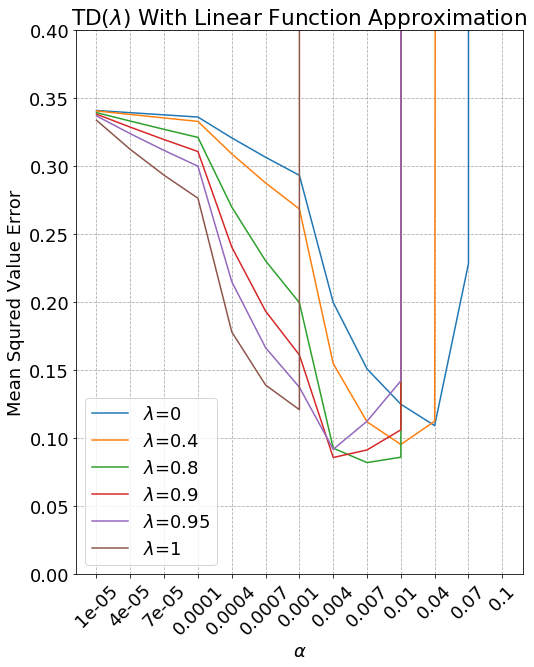

In [25]:

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 10)).add_subplot(111)
fig.title.set_text(r'TD($\lambda$) With Linear Function Approximation')
fig.set_ylabel('Mean Squred Value Error')
fig.set_xlabel(r'$\alpha$')
#fig.set_xlim(0, 1)
fig.set_ylim(0, 0.4)

alpha_list = [1e-5, 4e-5,7e-5,1e-4, 4e-4,7e-4,1e-3, 4e-3, 7e-3, 1e-2, 4e-2, 7e-2, 0.1]
#alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#lamda_list = [0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1]
#lamda_list = [0.8]
lamda_list = [0, 0.4, 0.8, 0.9, 0.95, 1]

runs = 50
for lamda in lamda_list:
    print(f'lambda value is {lamda}')
    loss = np.zeros((len(alpha_list), runs))
    for i in range(len(alpha_list)):
        print(f'\t\t alpha value is {alpha_list[i]}')
        for run in range(runs):
            np.random.seed(run)
            experiment = RandomWalk(lamda = lamda, alpha = alpha_list[i])
            result = experiment.train_evaluate()
            loss[i, run] = result
    #print(alpha_list)
    #print(loss)       
    fig.plot(np.arange(len(alpha_list)), np.mean(loss, axis = 1), label = r'$\lambda$' + '=' + str(lamda))
        
#plt.xticks(alpha_list)
plt.xticks(np.arange(len(alpha_list)), alpha_list, rotation = 45)
plt.grid(linestyle = '--')
plt.legend(loc = 'lower left')
plt.savefig('TD.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [0]:
from google.colab import files
files.download('TD.png')